$$\Huge{\text{Content-Based Filtering Recommendation}}$$

 # Content-Based Filtering Recommendation


## Introduction

### The requirement
- Item information: some information about the available items such as the genre ("content")
- User profile: some sort of user profile describing what the user likes (the preferences)

### “Similarity” is computed from item attributes, e.g.,
- Similarity of movies by actors, director, genre
- Similarity of text by words, topics
- Similarity of music by genre, year

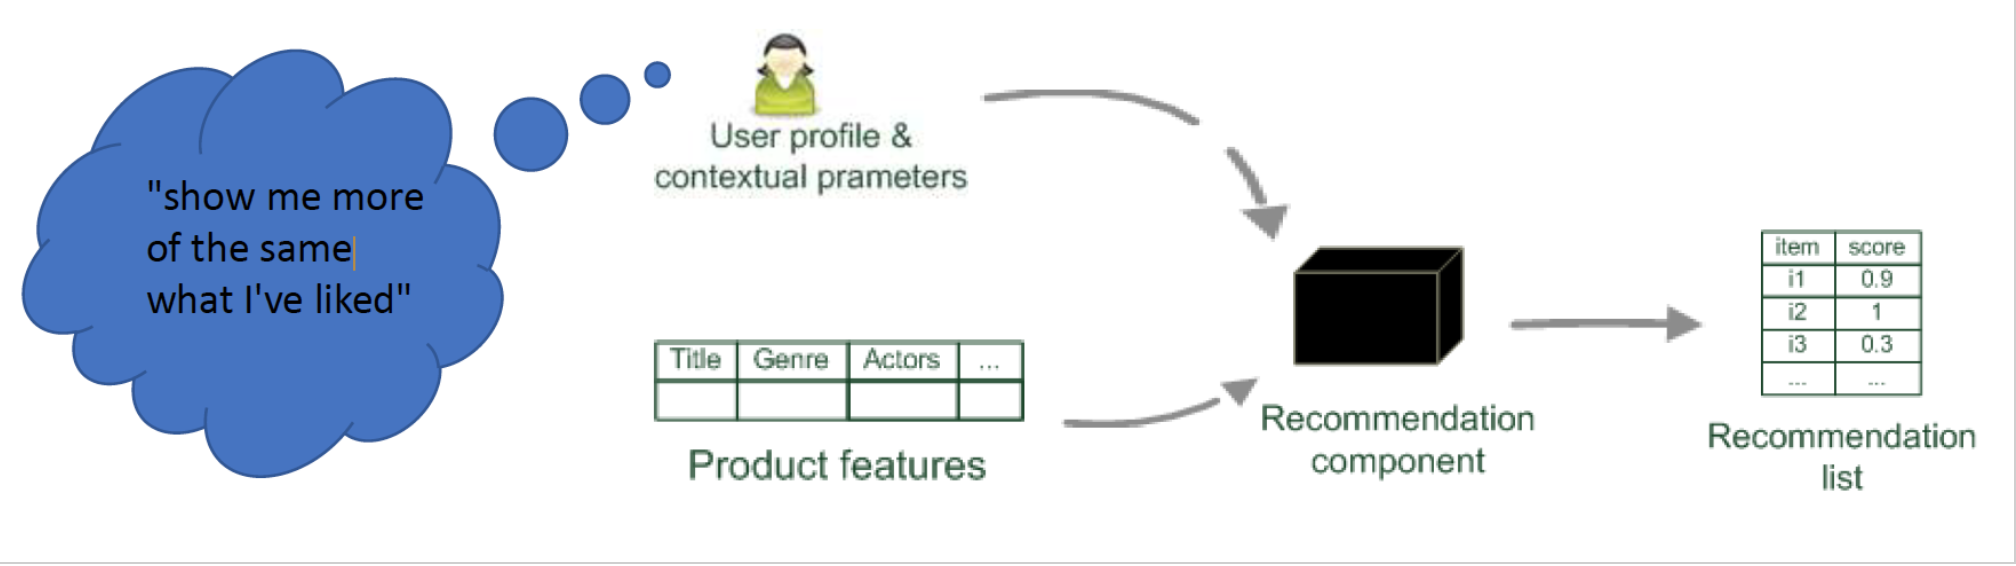

Most Content Based-recommendation techniques were applied to recommending text documents.
- Like web pages or newsgroup messages for example.
- Content of items can also be represented as text documents.
- With textual descriptions of their basic characteristics.
- Structured: Each item is described by the same set of attributes

## Utility matrix

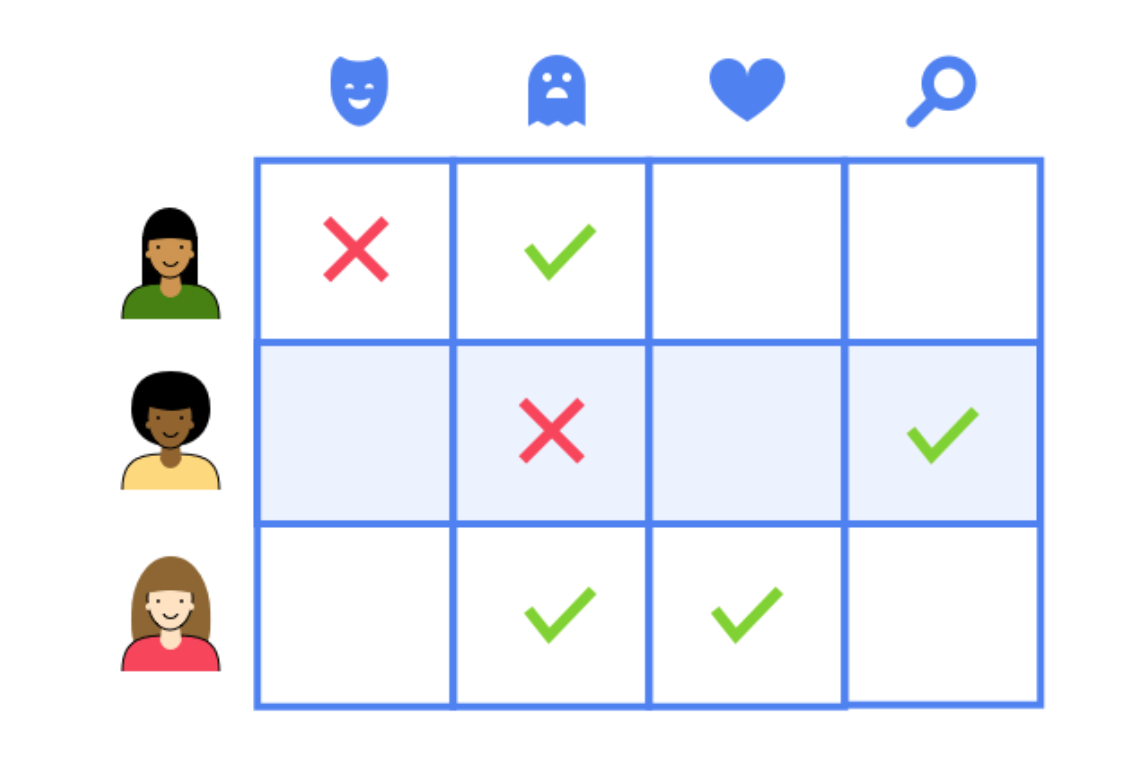

**TF-IDF** [ref](https://www.kaggle.com/edchen/tf-idf)

In [1]:
docA = "The car is driven on the road"
docB = "The truck is driven on the highway"
bowA = docA.split(" ")
bowB = docB.split(" ")
wordSet = set(bowA).union(set(bowB))
wordDictA = dict.fromkeys(wordSet, 0) 
wordDictB = dict.fromkeys(wordSet, 0)
for word in bowA:
    wordDictA[word]+=1
    
for word in bowB:
    wordDictB[word]+=1
import pandas as pd
pd.DataFrame([wordDictA, wordDictB])

The  car  driven  highway  is  on  road  the  truck
0    1    1       1        0   1   1     1    1      0
1    1    0       1        1   1   1     0    1      1

In [2]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [3]:
tfBowA = computeTF(wordDictA, bowA)
tfBowB = computeTF(wordDictB, bowB)

In [4]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [5]:
idfs = computeIDF([wordDictA, wordDictB])

In [6]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [7]:
tfidfBowA = computeTFIDF(tfBowA, idfs)
tfidfBowB = computeTFIDF(tfBowB, idfs)

In [8]:
import pandas as pd
pd.DataFrame([tfidfBowA, tfidfBowB])


The       car  driven   highway   is   on      road  the     truck
0  0.0  0.043004     0.0  0.000000  0.0  0.0  0.043004  0.0  0.000000
1  0.0  0.000000     0.0  0.043004  0.0  0.0  0.000000  0.0  0.043004

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

corpus = [
    "The car is driven on the road",
    "The truck is driven on the highway the the the the"
]

X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

car    driven   highway        is        on      road       the  \
0  0.424717  0.302190  0.000000  0.302190  0.302190  0.424717  0.604380   
1  0.000000  0.152586  0.214454  0.152586  0.152586  0.000000  0.915517   

      truck  
0  0.000000  
1  0.214454

# Introduce Movie Database 
[ref](https://grouplens.org/datasets/movielens/100k/) 

## Download data

In [ ]:
#!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

## Unzip data

In [ ]:
#!unzip ml-100k.zip

In [11]:
ls ml-100k/

README      u.data   u.item        u1.base  u2.test  u4.base  u5.test  ub.base
allbut.pl*  u.genre  u.occupation  u1.test  u3.base  u4.test  ua.base  ub.test
mku.sh*     u.info   u.user        u2.base  u3.test  u5.base  ua.test


## Users data

In [12]:
# User
import pandas as pd 
#Reading user file:
u_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
 encoding='latin-1')
pd.DataFrame(users, columns=u_cols)

user_id  age sex     occupation zip_code
0          1   24   M     technician    85711
1          2   53   F          other    94043
2          3   23   M         writer    32067
3          4   24   M     technician    43537
4          5   33   F          other    15213
5          6   42   M      executive    98101
6          7   57   M  administrator    91344
7          8   36   M  administrator    05201
8          9   29   M        student    01002
9         10   53   M         lawyer    90703
10        11   39   F          other    30329
11        12   28   F          other    06405
12        13   47   M       educator    29206
13        14   45   M      scientist    55106
14        15   49   F       educator    97301
15        16   21   M  entertainment    10309
16        17   30   M     programmer    06355
17        18   35   F          other    37212
18        19   40   M      librarian    02138
19        20   42   F      homemaker    95660
20        21   26   M         writer    30068
21        22   25   M         writer    40206
22        23   30   F         artist    48197
23        24   21   F         artist    94533
24        25   39   M       engineer    55107
25        26   49   M       engineer    21044
26        27   40   F      librarian    30030
27        28   32   M         writer    55369
28        29   41   M     programmer    94043
29        30    7   M        student    55436
..       ...  ...  ..            ...      ...
913      914   44   F          other    08105
914      915   50   M  entertainment    60614
915      916   27   M       engineer    N2L5N
916      917   22   F        student    20006
917      918   40   M      scientist    70116
918      919   25   M          other    14216
919      920   30   F         artist    90008
920      921   20   F        student    98801
921      922   29   F  administrator    21114
922      923   21   M        student    E2E3R
923      924   29   M          other    11753
924      925   18   F       salesman    49036
925      926   49   M  entertainment    01701
926      927   23   M     programmer    55428
927      928   21   M        student    55408
928      929   44   M      scientist    53711
929      930   28   F      scientist    07310
930      931   60   M       educator    33556
931      932   58   M       educator    06437
932      933   28   M        student    48105
933      934   61   M       engineer    22902
934      935   42   M         doctor    66221
935      936   24   M          other    32789
936      937   48   M       educator    98072
937      938   38   F     technician    55038
938      939   26   F        student    33319
939      940   32   M  administrator    02215
940      941   20   M        student    97229
941      942   48   F      librarian    78209
942      943   22   M        student    77841

[943 rows x 5 columns]

In [13]:
#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1')
items

movie id                                        movie title  \
0            1                                   Toy Story (1995)   
1            2                                   GoldenEye (1995)   
2            3                                  Four Rooms (1995)   
3            4                                  Get Shorty (1995)   
4            5                                     Copycat (1995)   
5            6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
6            7                              Twelve Monkeys (1995)   
7            8                                        Babe (1995)   
8            9                            Dead Man Walking (1995)   
9           10                                 Richard III (1995)   
10          11                               Seven (Se7en) (1995)   
11          12                         Usual Suspects, The (1995)   
12          13                            Mighty Aphrodite (1995)   
13          14                                 Postino, Il (1994)   
14          15                          Mr. Holland's Opus (1995)   
15          16                 French Twist (Gazon maudit) (1995)   
16          17                         From Dusk Till Dawn (1996)   
17          18                          White Balloon, The (1995)   
18          19                              Antonia's Line (1995)   
19          20                          Angels and Insects (1995)   
20          21                      Muppet Treasure Island (1996)   
21          22                                  Braveheart (1995)   
22          23                                 Taxi Driver (1976)   
23          24                         Rumble in the Bronx (1995)   
24          25                               Birdcage, The (1996)   
25          26                      Brothers McMullen, The (1995)   
26          27                                    Bad Boys (1995)   
27          28                                   Apollo 13 (1995)   
28          29                              Batman Forever (1995)   
29          30                               Belle de jour (1967)   
...        ...                                                ...   
1652      1653  Entertaining Angels: The Dorothy Day Story (1996)   
1653      1654                       Chairman of the Board (1998)   
1654      1655                                  Favor, The (1994)   
1655      1656                                 Little City (1998)   
1656      1657                                      Target (1995)   
1657      1658                      Substance of Fire, The (1996)   
1658      1659                    Getting Away With Murder (1996)   
1659      1660                                 Small Faces (1995)   
1660      1661                                New Age, The (1994)   
1661      1662                                 Rough Magic (1995)   
1662      1663                            Nothing Personal (1995)   
1663      1664                     8 Heads in a Duffel Bag (1997)   
1664      1665                           Brother's Kiss, A (1997)   
1665      1666                                        Ripe (1996)   
1666      1667                              Next Step, The (1995)   
1667      1668                          Wedding Bell Blues (1996)   
1668      1669                           MURDER and murder (1996)   
1669      1670                                     Tainted (1998)   
1670      1671                          Further Gesture, A (1996)   
1671      1672                                        Kika (1993)   
1672      1673                                      Mirage (1995)   
1673      1674                                  Mamma Roma (1962)   
1674      1675                              Sunchaser, The (1996)   
1675      1676                            War at Home, The (1996)   
1676      1677                               Sweet Nothing (1995)   
1677      1678                                  Mat' i syn (1997)   
1678

## User rating

In [14]:
#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

rate_train = ratings_base.as_matrix()
rate_test = ratings_test.as_matrix()
pd.DataFrame(ratings_base, columns=r_cols)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


user_id  movie_id  rating  unix_timestamp
0            1         1       5       874965758
1            1         2       3       876893171
2            1         3       4       878542960
3            1         4       3       876893119
4            1         5       3       889751712
5            1         6       5       887431973
6            1         7       4       875071561
7            1         8       1       875072484
8            1         9       5       878543541
9            1        10       3       875693118
10           1        11       2       875072262
11           1        12       5       878542960
12           1        13       5       875071805
13           1        14       5       874965706
14           1        15       5       875071608
15           1        16       5       878543541
16           1        17       3       875073198
17           1        18       4       887432020
18           1        19       5       875071515
19           1        21       1       878542772
20           1        22       4       875072404
21           1        23       4       875072895
22           1        24       3       875071713
23           1        25       4       875071805
24           1        26       3       875072442
25           1        27       2       876892946
26           1        28       4       875072173
27           1        29       1       878542869
28           1        30       3       878542515
29           1        31       3       875072144
...        ...       ...     ...             ...
90540      943       685       4       875502042
90541      943       717       4       875502116
90542      943       720       1       888640048
90543      943       721       5       888639660
90544      943       722       3       888640208
90545      943       724       1       888639478
90546      943       732       4       888639789
90547      943       739       4       888639929
90548      943       756       2       875502146
90549      943       763       4       875501813
90550      943       765       3       888640227
90551      943       785       2       888640088
90552      943       794       3       888640143
90553      943       796       3       888640311
90554      943       816       4       888640186
90555      943       824       4       875502483
90556      943       825       3       875502283
90557      943       831       2       875502283
90558      943       840       4       888693104
90559      943       928       5       875502074
90560      943       941       1       888639725
90561      943       943       5       888639614
90562      943      1011       2       875502560
90563      943      1028       2       875502096
90564      943      1044       3       888639903
90565      943      1047       2       875502146
90566      943      1074       4       888640250
90567      943      1188       3       888640250
90568      943      1228       3       888640275
90569      943      1330       3       888692465

[90570 rows x 4 columns]

# Algorithm Content-Based Recommendations

## Build Utility Matrix

Two methods to build user-item in Utility Matrix:
- Users rating item
- Behavior of user on item: Like/Dislike (Matrix with 0/1)

In [15]:
pd.DataFrame(ratings_base, columns=r_cols)

user_id  movie_id  rating  unix_timestamp
0            1         1       5       874965758
1            1         2       3       876893171
2            1         3       4       878542960
3            1         4       3       876893119
4            1         5       3       889751712
5            1         6       5       887431973
6            1         7       4       875071561
7            1         8       1       875072484
8            1         9       5       878543541
9            1        10       3       875693118
10           1        11       2       875072262
11           1        12       5       878542960
12           1        13       5       875071805
13           1        14       5       874965706
14           1        15       5       875071608
15           1        16       5       878543541
16           1        17       3       875073198
17           1        18       4       887432020
18           1        19       5       875071515
19           1        21       1       878542772
20           1        22       4       875072404
21           1        23       4       875072895
22           1        24       3       875071713
23           1        25       4       875071805
24           1        26       3       875072442
25           1        27       2       876892946
26           1        28       4       875072173
27           1        29       1       878542869
28           1        30       3       878542515
29           1        31       3       875072144
...        ...       ...     ...             ...
90540      943       685       4       875502042
90541      943       717       4       875502116
90542      943       720       1       888640048
90543      943       721       5       888639660
90544      943       722       3       888640208
90545      943       724       1       888639478
90546      943       732       4       888639789
90547      943       739       4       888639929
90548      943       756       2       875502146
90549      943       763       4       875501813
90550      943       765       3       888640227
90551      943       785       2       888640088
90552      943       794       3       888640143
90553      943       796       3       888640311
90554      943       816       4       888640186
90555      943       824       4       875502483
90556      943       825       3       875502283
90557      943       831       2       875502283
90558      943       840       4       888693104
90559      943       928       5       875502074
90560      943       941       1       888639725
90561      943       943       5       888639614
90562      943      1011       2       875502560
90563      943      1028       2       875502096
90564      943      1044       3       888639903
90565      943      1047       2       875502146
90566      943      1074       4       888640250
90567      943      1188       3       888640250
90568      943      1228       3       888640275
90569      943      1330       3       888692465

[90570 rows x 4 columns]

## Item profiles

### Regression Model

We using regression to build model for each user:
- $\mathbf x_i$: tf-idf of movies i$^{th}$(by catogories)
- $y_i$: ranking of user on movie i

$$y = \mathbf{x} \mathbf{w} + b ~~~~(1)$$

$$\mathcal{L} = \frac{1}{2} \sum_i^n(\mathbf{x}_i \mathbf{w} + b - y_i)^2 + \frac{\lambda}{2} ||\mathbf{w}||_2^2$$

## Demo with MovieLens 100k

- 100k ratings from 943 users for 1682 movies.
- u.data: Full data ratings, each user rate atleast 20 movies
- ua.base, ua.test, ub.base, ub.test: data for training and test
- u.user: user info
- u.genre: category of movies
- u.item: movies information

### Build item profile (movie info )

In [16]:
#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 
          'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s',
          'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
          'Sci-Fi', 'Thriller', 'War', 'Western']



# n_items = items.shape[0]
# print('Number of items:', n_items)

We are basing on the **category of movies** to build profile, so just using last **19 columns binary for category.**

In [17]:
X0 = items.as_matrix()
X_train_counts = X0[:, -19:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [18]:
pd.DataFrame(X_train_counts, columns=i_cols[-19:])

unknown Action Adventure Animation Children's Comedy Crime Documentary  \
0          0      0         0         1          1      1     0           0   
1          0      1         1         0          0      0     0           0   
2          0      0         0         0          0      0     0           0   
3          0      1         0         0          0      1     0           0   
4          0      0         0         0          0      0     1           0   
5          0      0         0         0          0      0     0           0   
6          0      0         0         0          0      0     0           0   
7          0      0         0         0          1      1     0           0   
8          0      0         0         0          0      0     0           0   
9          0      0         0         0          0      0     0           0   
10         0      0         0         0          0      0     1           0   
11         0      0         0         0          0      0     1           0   
12         0      0         0         0          0      1     0           0   
13         0      0         0         0          0      0     0           0   
14         0      0         0         0          0      0     0           0   
15         0      0         0         0          0      1     0           0   
16         0      1         0         0          0      1     1           0   
17         0      0         0         0          0      0     0           0   
18         0      0         0         0          0      0     0           0   
19         0      0         0         0          0      0     0           0   
20         0      1         1         0          0      1     0           0   
21         0      1         0         0          0      0     0           0   
22         0      0         0         0          0      0     0           0   
23         0      1         1         0          0      0     1           0   
24         0      0         0         0          0      1     0           0   
25         0      0         0         0          0      1     0           0   
26         0      1         0         0          0      0     0           0   
27         0      1         0         0          0      0     0           0   
28         0      1         1         0          0      1     1           0   
29         0      0         0         0          0      0     0           0   
...      ...    ...       ...       ...        ...    ...   ...         ...   
1652       0      0         0         0          0      0     0           0   
1653       0      0         0         0          0      1     0           0   
1654       0      0         0         0          0      1     0           0   
1655       0      0         0         0          0      1     0           0   
1656       0      1         0         0          0      0     0           0   
1657       0      0         0         0          0      0     0           0   
1658       0      0         0         0          0      1     0           0   
1659       0      0         0         0          0      0     0           0   
1660       0      0         0         0          0      0     0           0   
1661       0      0         0         0          0      0     0           0   
1662       0      0         0         0          0      0     0           0   
1663       0      0         0         0          0      1     0           0   
1664       0      0         0         0          0      0     0           0   
1665       0      0         0         0          0      0     0           0   
1666       0      0         0         0          0      0     0           0   
1667       0      0         0         0          0      1     0           0   
1668       0      0         0         0          0      0     1           0   
1669       0      0         0         0          0      1     0           0   
1670       0      0         0         0          0     

Build Feature vector for each item on category matrix and feature **TF-IDF:**

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True, norm ='l2')
tfidf = transformer.fit_transform(X_train_counts.tolist()).toarray()

In [20]:
pd.DataFrame(tfidf, columns=i_cols[-19:])

unknown    Action  Adventure  Animation  Children's    Comedy     Crime  \
0         0.0  0.000000   0.000000    0.74066    0.573872  0.349419  0.000000   
1         0.0  0.536767   0.650970    0.00000    0.000000  0.000000  0.000000   
2         0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
3         0.0  0.710652   0.000000    0.00000    0.000000  0.539759  0.000000   
4         0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.735504   
5         0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
6         0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
7         0.0  0.000000   0.000000    0.00000    0.783294  0.476931  0.000000   
8         0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
9         0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
10        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.789407   
11        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.789407   
12        0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
13        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
14        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
15        0.0  0.000000   0.000000    0.00000    0.000000  0.602733  0.000000   
16        0.0  0.407011   0.000000    0.00000    0.000000  0.309136  0.523397   
17        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
18        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
19        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
20        0.0  0.397275   0.481799    0.00000    0.000000  0.301741  0.000000   
21        0.0  0.538049   0.000000    0.00000    0.000000  0.000000  0.000000   
22        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
23        0.0  0.492398   0.597161    0.00000    0.000000  0.000000  0.633200   
24        0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
25        0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
26        0.0  1.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
27        0.0  0.645065   0.000000    0.00000    0.000000  0.000000  0.000000   
28        0.0  0.461200   0.559325    0.00000    0.000000  0.350294  0.593081   
29        0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
...       ...       ...        ...        ...         ...       ...       ...   
1652      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1653      0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
1654      0.0  0.000000   0.000000    0.00000    0.000000  0.602733  0.000000   
1655      0.0  0.000000   0.000000    0.00000    0.000000  0.602733  0.000000   
1656      0.0  0.844185   0.000000    0.00000    0.000000  0.000000  0.000000   
1657      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1658      0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
1659      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1660      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1661      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1662      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1663      0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
1664      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1665      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1666      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.000000   
1667      0.0  0.000000   0.000000    0.00000    0.000000  1.000000  0.000000   
1668      0.0  0.000000   0.000000    0.00000    0.000000  0.000000  0.623167   
1669      0.0  0.000000   0.000000   

In [21]:
#Find value movies rated for each user
import numpy as np
def get_items_rated_by_user(rate_matrix, user_id):
    """
    in each line of rate_matrix, we have infor: user_id, item_id, rating (scores), time_stamp
    we care about the first three values
    return (item_ids, scores) rated by user user_id
    """
    y = rate_matrix[:,0] # all users
    # item indices rated by user_id
    # we need to +1 to user_id since in the rate_matrix, id starts from 1 
    # while index in python starts from 0
    ids = np.where(y == user_id +1)[0]
    item_ids = rate_matrix[ids, 1] - 1 # index starts from 0 
    scores = rate_matrix[ids, 2]
    return (item_ids, scores)

In [22]:
get_items_rated_by_user(rate_train, 0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184

### Find model for each user

In [24]:
#Find parameters for Ridge Regression for each user
from sklearn.linear_model import Ridge
from sklearn import linear_model
n_users = 943
d = tfidf.shape[1] # data dimension = number of features(catogories) of movies
W = np.zeros((d, n_users)) # use store user model, each user have one linear model 
b = np.zeros((1, n_users))
   
for n in range(n_users):   
    # movieid, rating
    ids, scores = get_items_rated_by_user(rate_train, n)
   
    # tfidf of movieid
    Xhat = tfidf[ids, :] 
   
    clf = Ridge(alpha=0.01, fit_intercept  = True)
     
    clf.fit(Xhat, scores) # from feartures (Xhat) of movies -> rating (score) for only one userid = n
    W[:, n] = clf.coef_
    b[0, n] = clf.intercept_
    
    _

In [25]:
print('W- number of features: ', W.shape[0], ', users: ', W.shape[1])
print('TF-IDF - number of movies: ', tfidf.shape[0], ', number of features: ', tfidf.shape[1])

W- number of features:  19 , users:  943
TF-IDF - number of movies:  1682 , number of features:  19


In [26]:
# Predict rating for eache items
# predicted scores
Yhat = tfidf.dot(W) + b

In [27]:
# Yhat: [movieid, userid] -> rating
pd.DataFrame(Yhat)

0         1         2         3         4         5         6    \
0     2.918383  3.996178  1.903055  5.658151  3.477677  3.058388  4.464039   
1     2.802631  3.435016  3.299043  2.880131  2.851404  3.574207  3.971852   
2     3.483039  1.561910  1.269489  4.945724  2.146425  3.599151  3.788234   
3     3.581985  6.094671  3.650986  6.174447  3.069453  3.115643  3.966114   
4     3.807131  3.706647  3.405541  5.020828  3.483985  4.103937  4.223580   
5     4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
6     4.697968  2.646448  2.325260  4.961232  3.321938  3.546526  4.126911   
7     2.337383  6.598841  2.799265  6.462262  1.905271  2.982017  3.964223   
8     4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
9     3.674802  2.492870  2.903210  8.662538  3.033999  3.895801  4.748959   
10    3.422162  2.531307  2.875656  4.037761  3.476743  3.761959  3.969231   
11    3.422162  2.531307  2.875656  4.037761  3.476743  3.761959  3.969231   
12    3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
13    4.126798  4.096470  3.021079  4.212062  1.212656  3.717300  3.698063   
14    4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
15    3.834240  4.024355  2.995109  2.533040  1.783350  3.594827  3.507309   
16    3.409790  5.177848  3.590278  4.193265  3.707421  4.038751  3.869526   
17    4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
18    4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
19    4.126798  4.096470  3.021079  4.212062  1.212656  3.717300  3.698063   
20    3.165687  4.518548  3.111603  3.105136  3.608763  4.167853  4.209727   
21    3.389223  4.022913  3.160542  7.982212  3.117488  3.378187  4.540497   
22    4.018149  3.314626  2.218107  6.363626  2.283581  4.059254  4.159438   
23    2.680068  3.673233  4.442030  2.604315  3.823523  3.412482  3.993620   
24    3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
25    3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
26    2.661423  3.651287  2.284530  5.518257  2.462837  1.938192  3.392454   
27    3.562378  4.842001  2.614563  5.964012  2.511908  3.333285  3.983497   
28    2.900992  4.616913  4.796856  2.469672  4.100862  3.668788  4.091813   
29    4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
...        ...       ...       ...       ...       ...       ...       ...   
1652  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1653  3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
1654  3.834240  4.024355  2.995109  2.533040  1.783350  3.594827  3.507309   
1655  3.834240  4.024355  2.995109  2.533040  1.783350  3.594827  3.507309   
1656  3.324553  5.078447  3.074990  6.846950  2.550691  2.657097  3.825327   
1657  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1658  3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
1659  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1660  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1661  4.126798  4.096470  3.021079  4.212062  1.212656  3.717300  3.698063   
1662  3.674802  2.492870  2.903210  8.662538  3.033999  3.895801  4.748959   
1663  3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
1664  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1665  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1666  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1667  3.567235  3.450683  2.925444  5.007610  3.128261  3.388288  3.771559   
1668  3.619036  4.036071  4.164263  4.954374  3.697963  4.303575  4.103309   
1669  3.730486  3.285731  2.237202  4.557164  2.795749  3.916715  3.941802   
1670  4.133819  3.803618  3.099034  8.343992  2.304220  3.670496  4.191362   
1671  4.133819  3.803618  3.09903

In [28]:
#example with userid=100
n = 100
pd.options.display.float_format = '${:,.2f}'.format
ids, scores = get_items_rated_by_user(rate_test, n)
real_rating = np.hstack( ('Real rating', scores))
p = Yhat[ids, n]
p = ["{0:.2f}".format(p) for p in p]
predict_rating = np.hstack( ('Predict rating', p))

df = pd.DataFrame(np.vstack((real_rating,predict_rating)), columns=np.hstack(('movieid', ids.astype('str'))))
df.set_index('movieid', inplace=True)
df

221   251   280   281   303   368   404   470   595   828
movieid                                                                   
Real rating        3     3     2     3     3     2     4     3     3     3
Predict rating  3.28  3.50  3.07  2.28  3.23  2.11  2.83  3.29  2.69  3.28

### Evaluate model using RMSE

In [29]:
#Error = [True rating] - [Predicted rating]
import numpy as np
def evaluate(Yhat, rates, W, b):
    se = 0
    cnt = 0
    for n in range(n_users):
        ids, scores_truth = get_items_rated_by_user(rates, n)
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        se += (e*e).sum(axis = 0)
        cnt += e.size 
    return np.sqrt(se/cnt)

print('RMSE for training:', evaluate(Yhat, rate_train, W, b))
print('RMSE for test    :', evaluate(Yhat, rate_test, W, b))

RMSE for training: 0.9089804562826721
RMSE for test    : 1.2703282700393037


In [38]:
#Error = [True rating] - [Predicted rating]
import numpy as np
def evaluate1(Yhat, rates, W, b, toloren=1):
    se = 0
    cnt = 0
    total = 0
    for n in range(n_users):
        ids, scores_truth = get_items_rated_by_user(rates, n)
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        
        for x in e :
            total += 1
            if abs(x)> toloren: 
                cnt +=1

        ##print(se)
        ##break
         
    return (cnt/total)

print('RMSE for training error %:', evaluate1(Yhat, rate_train, W, b))
print('RMSE for test error %:', evaluate1(Yhat, rate_test, W, b))

RMSE for training error %: 0.2615104339185161
RMSE for test error %: 0.3853658536585366


## Discussion

- RMSE big, result not good. CF will be better
- Content-based Recommendation Systems: simple method to build model for each user, not relate to other users
- It is Regression or Classification, item profile not depend on user
- Not good: Not use information from other users and sometime do not have item information